<h1>Criando arquivos stl para impressão 3D com Python</h1>

Um arquivo stl é um arquivo com dados que descrevem um objeto tridimensional. Estes arquivos são muito utilizados para impressão 3D. Nesse tutorial aprenderemos a ler e criar arquivos stl com Python!

Para auxiliar nossos trabalhos utilizaremos a biblioteca numpy-stl. Para instalar esta biblioteca basta digitar o comando abaixo sem o #:

In [1]:
# !pip install numpy-stl

Clicando aqui (https://grabcad.com/library/118801) você pode fazer o download do arquivo <i>ironman.stl</i>.

<h3>Visualizando arquivos STL</h3>

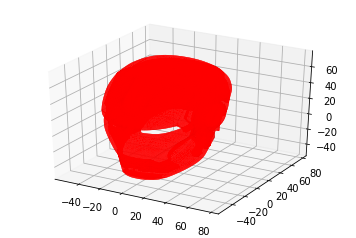

In [11]:
# bibliotecas
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

# carregando o arquivo ironman.STL
your_mesh = mesh.Mesh.from_file(
    'ironman.STL'
)

# janela de figura
figure = plt.figure()

# eixos tridimensionais 
axes = figure.gca(projection='3d')

# adicionando vetores a figura
axes.add_collection3d(
    mplot3d.art3d.Poly3DCollection(
        your_mesh.vectors,
        facecolors='r',
        alpha=0.2
    )
)

# escalas
scale = your_mesh.points.flatten('F')
axes.auto_scale_xyz(scale, scale, scale)

# visualizando
plt.show()

Caso queira utilizar um visualizador de arquivo online, segue algumas sugestões: 

- https://3d-viewers.com/pt/stl-viewer.html
- https://www.viewstl.com/

<h3>Criando seus próprios arquivos</h3>

In [3]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import stl

Fonte: https://github.com/WoLpH/numpy-stl/issues/19

In [4]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

In [5]:
# parâmetros
u = (
    np.linspace(
        0, 2.0 * np.pi,
        endpoint=True,
        num=50
    ) * np.ones(
        (10, 1))
).flatten()

v = np.repeat(
    np.linspace(
        -1.5, 1.5,
        endpoint=True,
        num=10),
    repeats=50
).flatten()

In [6]:
# paramétricas
x = np.cosh(v) * np.cos(u)
y = np.cosh(v) * np.sin(u)
z = np.sinh(v)

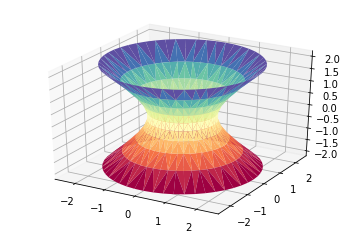

In [7]:
# Triangulalizarndo os parâmetros
tri = mtri.Triangulation(u, v)

# janela da figura
figure = plt.figure()

# eixos tridimensionais
ax = figure.gca(projection='3d')

# hiperboloide
hiperboloide_triangulizado = ax.plot_trisurf(
    x, y, z,
    triangles=tri.triangles,
    cmap=plt.cm.Spectral
)

# visualizando
plt.show()

In [8]:
# malha poligonal nula
dados = np.zeros(
    len(tri.triangles),
    dtype=mesh.Mesh.dtype
)

hiperboloide_mesh = mesh.Mesh(
    dados,
    remove_empty_areas=False
)

In [9]:
# passando valores para a malha poligonal
hiperboloide_mesh.x[:] = x[tri.triangles]
hiperboloide_mesh.y[:] = y[tri.triangles]
hiperboloide_mesh.z[:] = z[tri.triangles]

# salvando a malha em arquivo STL
hiperboloide_mesh.save('hiperboloide.stl')